---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span
$$

---

---
# 8.3 Chebyshev Polynomials and Economization of Power Series
---

## The $w$-inner-product and $w$-norm
We now consider using a different inner-product to obtain different families of orthogonal polynomials.

Let $w(x) \in C[a,b]$ be a function that satisfies

$$w(x) \geq 0, \quad x \in [a,b].$$

We then define the **$w$-inner-product**,

$$\ip{f}{g}_w := \int_a^b  f(x) g(x)\,w(x) dx, $$

and the corresponding **$w$-norm**,

$$\norm{f}_w := \sqrt{\ip{f}{f}_w} = \paren{\int_a^b  \brack{f(x)}^2 \,w(x) dx}^\frac12.$$

## The weighted least-squares problem

Using the $w$-norm, we get the **weighted least-squares problem**:

$$\min_{p \in S} \norm{f - p}_w^2 = \int_a^b  \brack{f(x) - p(x)}^2\,w(x) dx,$$

where $S = \span\set{\phi_0,\ldots,\phi_n}$.

Thus, the **weight function** $w(x)$ can be used to put more or less emphasisis on having $p(x)$ approximate $f(x)$ over the interval $[a,b]$.

For example, for $x \in [a,b]$ where $w(x) \approx 0$, we do not need $p(x)$ to approximate $f(x)$ very well.

For $x \in [a,b]$ where $w(x) \gg 0$, we will need $p(x)$ to approximate $f(x)$ very closely.




## Solving the weighted least-squares problem

Using exactly the same reasoning as in Section 12.3, we can compute the least-squares solution 

$$p = \sum_{j=0}^n c_j \phi_j$$

by solving the **normal equations** $Bc = b$, where now we have

$$
B := 
\begin{bmatrix}
\ip{\phi_0}{\phi_0}_w & \cdots & \ip{\phi_0}{\phi_n}_w \\
\vdots & \ddots & \vdots\\
\ip{\phi_n}{\phi_0}_w & \cdots & \ip{\phi_n}{\phi_n}_w \\
\end{bmatrix},
\qquad
b := 
\begin{bmatrix}
\ip{f}{\phi_0}_w\\
\vdots\\
\ip{f}{\phi_n}_w\\
\end{bmatrix}.
$$


## Orthogonal basis

As in the previous section, we would like to find an basis $\set{\phi_0,\ldots,\phi_n}$ that is orthogonal with respect to the $w$-inner-product:

$$\ip{\phi_i}{\phi_j}_w = 0, \quad i \neq j.$$

We can obtain this by applying the **Gram-Schmidt process** to the monomial basis $\set{1,x,\ldots,x^n}$.

## Three-term recurrence relation

As with the Legendre polynomials, we also obtain a three-term recurrence relation when using the $w$-inner-product:

$$
\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= x - \beta_1\\
\phi_k(x) &= (x - \beta_k)\phi_{k-1}(x) - \gamma_k\phi_{k-2}(x), \quad k \geq 2\\
\end{align}
$$

where

$$
\beta_k = \frac{\ip{x\phi_{k-1}}{\phi_{k-1}}_w}{\ip{\phi_{k-1}}{\phi_{k-1}}_w}, \quad k \geq 1,
$$

and 

$$
\gamma_k = \frac{\ip{x\phi_{k-1}}{\phi_{k-2}}_w}{\ip{\phi_{k-2}}{\phi_{k-2}}_w}, \quad k \geq 2.
$$

It can be proven using mathematical induction that these polynomials $\phi_0,\ldots,\phi_n$ are pairwise-orthogonal.

## **Legendre polynomials**:  $w(x) = 1$ over $[-1, 1]$

$$
\begin{align}
\phi_0(x) &= 1,\\
\phi_1(x) &= x,\\
\phi_{k+1}(x) &= \frac{2k+1}{k+1} x \phi_k(x) - \frac{k}{k+1} \phi_{k-1}(x), \quad k = 1,\ldots,n-1.\\
\end{align}
$$

## **Laguerre polynomials**:  $w(x) = e^{-x}$ over $[0,\infty)$

$$\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= 1 - x\\
\phi_{k+1}(x) &= \frac{2k+1 - x}{k+1} \phi_k(x) - \frac{k}{k+1}\phi_{k-1}(x), \quad k = 1,2,\ldots,n-1.
\end{align}
$$
  

## **Hermite polynomials**:  $w(x) = e^{-x^2}$ over $(-\infty, \infty)$

$$\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= 2x\\
\phi_{k+1}(x) &= 2x\phi_k(x) - 2k\phi_{k-1}(x), \quad k = 1,2,\ldots,n-1.
\end{align}
$$

## **Chebyshev polynomials**: $w(x) = \frac{1}{\sqrt{1-x^2}}$ over $[-1,1]$

$$\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= x\\
\phi_{k+1}(x) &= 2x\phi_k(x) - \phi_{k-1}(x), \quad k = 1,2,\ldots,n-1.
\end{align}
$$

---

## Laguerre polynomials

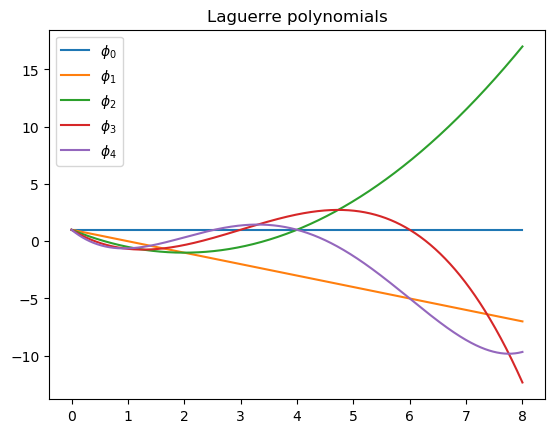

In [1]:
using PyPlot

n = 4

xx = linspace(0, 8, 1000)

ϕ0 = ones(xx)
ϕ1 = 1 - xx
plot(xx, ϕ0)
plot(xx, ϕ1)

ϕolder, ϕold = ϕ0, ϕ1
for k = 1:n-1
    ϕ = ((2k + 1 - xx).*ϕold - k*ϕolder)/(k+1)
    plot(xx, ϕ)
    ϕolder, ϕold = ϕold, ϕ
end

leg = map(latexstring, ["\\phi_$i" for i=0:n])
legend(leg, loc="best")
title("Laguerre polynomials");

---

## Example

Let's use the **Laguerre basis** to find an **exact representation** of the polynomial of degree at most **four** that best fits $f(x) = \cos(x)$ over the interval $[0, \infty)$ with respect to the $w$-norm, where $w(x) = e^{-x}$.

In [2]:
using SymPy

n = 4

x = symbols("x")
w = exp(-x)  # Define the weight function

 -x
e  

In [3]:
ϕ = zeros(Sym, n+1)

ϕ[1] = 1
ϕ[2] = 1 - x
for k = 1:n-1
    ϕ[k+2] = expand(((2k + 1 - x)*ϕ[k+1] - k*ϕ[k])/(k+1))
end

ϕ

5-element Array{SymPy.Sym,1}:
                                  1
                             -x + 1
                    x^2/2 - 2*x + 1
         -x^3/6 + 3*x^2/2 - 3*x + 1
 x^4/24 - 2*x^3/3 + 3*x^2 - 4*x + 1

In [4]:
oo

oo

In [5]:
B = Sym[integrate(w*ϕ[i]*ϕ[j], x, 0, oo) for i=1:n+1, j=1:n+1]

5×5 Array{SymPy.Sym,2}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

In [6]:
b = Sym[integrate(w*ϕ[i]*cos(x), x, 0, oo) for i=1:n+1]

5-element Array{SymPy.Sym,1}:
  1/2
  1/2
  1/4
    0
 -1/8

In [7]:
c = b
p = expand(c ⋅ ϕ)

    4    3    2        
   x    x    x    x   9
- --- + -- - -- - - + -
  192   12   4    2   8

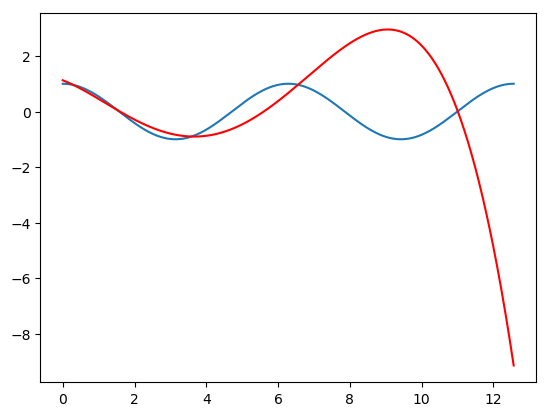

In [8]:
using PyPlot

xx = linspace(0, 4π, 1000)
yy = Float64[subs(p, x, xi) for xi in xx]

plot(xx, cos.(xx))
plot(xx, yy, "r");

---

## Hermite polynomials

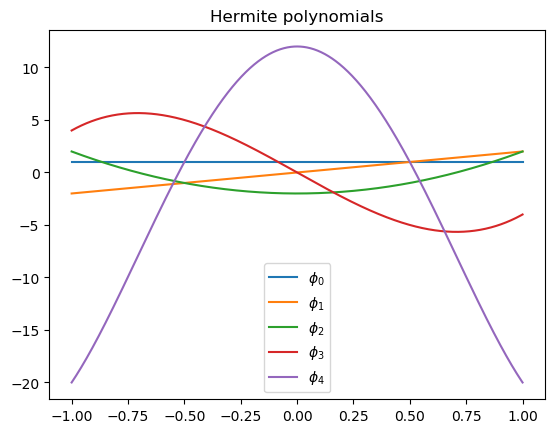

In [9]:
using PyPlot

n = 4

xx = linspace(-1, 1, 1000)

ϕ0 = ones(xx)
ϕ1 = 2xx
plot(xx, ϕ0)
plot(xx, ϕ1)

ϕolder, ϕold = ϕ0, ϕ1
for k = 1:n-1
    ϕ = 2xx.*ϕold - 2k*ϕolder
    plot(xx, ϕ)
    ϕolder, ϕold = ϕold, ϕ
end

leg = map(latexstring, ["\\phi_$i" for i=0:n])
legend(leg, loc="best")
title("Hermite polynomials");

---

## Example

Let's use the **Hermite basis** to find an **exact representation** of the polynomial of degree at most **four** that best fits $f(x) = \cos(x)$ over the interval $(-\infty, \infty)$ with respect to the $w$-norm, where $w(x) = e^{-x^2}$.

In [10]:
using SymPy

n = 4

x = symbols("x")
w = exp(-x^2)  # Define the weight function

   2
 -x 
e   

In [11]:
ϕ = zeros(Sym, n+1)

ϕ[1] = 1
ϕ[2] = 2x
for k = 1:n-1
    ϕ[k+2] = expand(2x*ϕ[k+1] - 2k*ϕ[k])
end

ϕ

5-element Array{SymPy.Sym,1}:
                    1
                  2*x
            4*x^2 - 2
         8*x^3 - 12*x
 16*x^4 - 48*x^2 + 12

In [12]:
B = Sym[integrate(w*ϕ[i]*ϕ[j], x, -oo, oo) for i=1:n+1, j=1:n+1]

5×5 Array{SymPy.Sym,2}:
 sqrt(pi)           0           0            0             0
        0  2*sqrt(pi)           0            0             0
        0           0  8*sqrt(pi)            0             0
        0           0           0  48*sqrt(pi)             0
        0           0           0            0  384*sqrt(pi)

The **Hermite polynomials** satisfy

$$\ip{\phi_k}{\phi_k}_w = 2^k k! \sqrt{\pi}, \quad k=0,\ldots,n.$$

(See [Hermite polynomials](http://en.wikipedia.org/wiki/Hermite_polynomials))

In [13]:
d = Sym[2^k*factorial(k)*√PI for k=0:n]

5-element Array{SymPy.Sym,1}:
     sqrt(pi)
   2*sqrt(pi)
   8*sqrt(pi)
  48*sqrt(pi)
 384*sqrt(pi)

In [14]:
b = Sym[integrate(w*ϕ[i]*cos(x), x, -oo, oo) for i=1:n+1]

5-element Array{SymPy.Sym,1}:
  sqrt(pi)*exp(-1/4)
                   0
 -sqrt(pi)*exp(-1/4)
                   0
  sqrt(pi)*exp(-1/4)

In [15]:
c = b./d

5-element Array{SymPy.Sym,1}:
     exp(-1/4)
             0
  -exp(-1/4)/8
             0
 exp(-1/4)/384

In [16]:
p = expand(c ⋅ ϕ)

 4  -1/4      2  -1/4       -1/4
x *e       5*x *e       41*e    
-------- - ---------- + --------
   24          8           32   

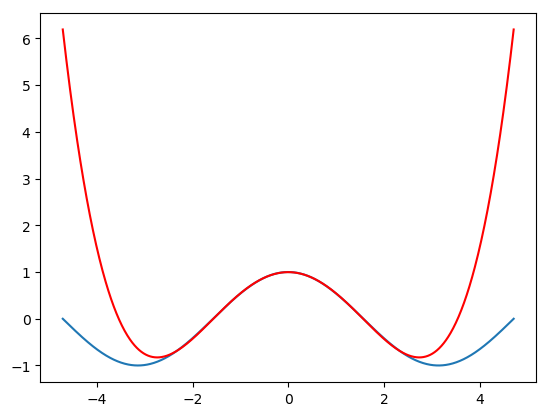

In [17]:
using PyPlot

xx = linspace(-3π/2, 3π/2, 1000)
yy = Float64[subs(p, x, xi) for xi in xx]

plot(xx, cos.(xx))
plot(xx, yy, "r");

---

## Chebyshev polynomials

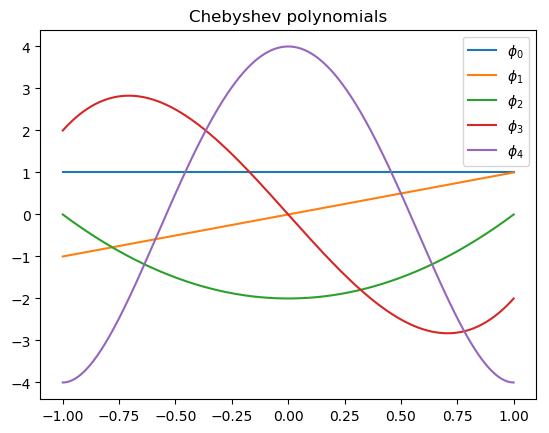

In [18]:
using PyPlot

n = 4

xx = linspace(-1, 1, 1000)

ϕ0 = ones(xx)
ϕ1 = xx
plot(xx, ϕ0)
plot(xx, ϕ1)

ϕolder, ϕold = ϕ0, ϕ1
for k = 1:n-1
    ϕ = 2xx.*ϕold - 2ϕolder
    plot(xx, ϕ)
    ϕolder, ϕold = ϕold, ϕ
end

leg = map(latexstring, ["\\phi_$i" for i=0:n])
legend(leg, loc="best")
title("Chebyshev polynomials");

---

## Example

Let's use the **Chebyshev basis** to find an **exact representation** of the polynomial of degree at most **two** that best fits $f(x) = \cos(x)$ over the interval $[-1,1]$ with respect to the $w$-norm, where $w(x) = \frac{1}{\sqrt{1-x^2}}$.

In [19]:
using SymPy

n = 4

x, t = symbols("x, t")
w = 1/√(1-x^2)  # Define the weight function

      1      
-------------
   __________
  /    2     
\/  - x  + 1 

In [20]:
ϕ = zeros(Sym, n+1)

ϕ[1] = 1
ϕ[2] = x
for k = 1:n-1
    ϕ[k+2] = expand(2x*ϕ[k+1] - ϕ[k])
end

ϕ

5-element Array{SymPy.Sym,1}:
                 1
                 x
         2*x^2 - 1
       4*x^3 - 3*x
 8*x^4 - 8*x^2 + 1

The **Chebyshev polynomials** satisfy

$$
\begin{align}
\ip{\phi_0}{\phi_0}_w &= \pi,\\
\ip{\phi_k}{\phi_k}_w &= \frac{\pi}{2}, \quad k=1,\ldots,n.
\end{align}$$

In [21]:
d = [PI; PI/2*ones(Sym, n)]

5-element Array{SymPy.Sym,1}:
   pi
 pi/2
 pi/2
 pi/2
 pi/2

Now we need to compute

$$\ip{\phi_k}{\cos}_w = \int_{-1}^1 \frac{\phi_k(x) \cos(x)}{\sqrt{1-x^2}} dx.$$

Let $x = \cos(\theta)$. Then $dx = -\sin(\theta) d\theta$.

Therefore,

$$\ip{\phi_k}{\cos}_w = \int_{0}^\pi \cos(k\theta) \cos(\cos(\theta))\,d\theta.$$


In [22]:
b = Sym[integrate(cos(k*t)*cos(cos(t)), t, 0, PI) for k=0:n]

5-element Array{SymPy.Sym,1}:
          Integral(cos(cos(t)), (t, 0, pi))
   Integral(cos(t)*cos(cos(t)), (t, 0, pi))
 Integral(cos(2*t)*cos(cos(t)), (t, 0, pi))
 Integral(cos(3*t)*cos(cos(t)), (t, 0, pi))
 Integral(cos(4*t)*cos(cos(t)), (t, 0, pi))

In [23]:
b = float(b)

5-element Array{Float64,1}:
  2.40394     
  1.78592e-102
 -0.36098     
  1.78592e-102
  0.00778059  

In [24]:
c = b./float(d)

5-element Array{Float64,1}:
  0.765198    
  1.13695e-102
 -0.229807    
  1.13695e-102
  0.00495328  

In [25]:
p = expand(c ⋅ ϕ)

                    4                          3                      2       
0.0396262234257593*x  + 4.54780233035711e-102*x  - 0.499240163153361*x  - 2.27

                                       
390116517855e-102*x + 0.999957934349987

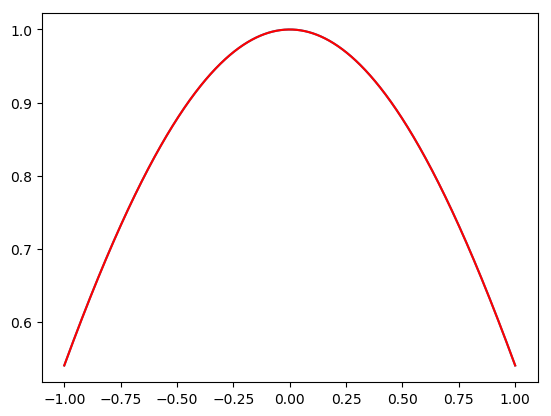

In [26]:
using PyPlot

xx = linspace(-1, 1, 1000)
yy = Float64[subs(p, x, xi) for xi in xx]

plot(xx, cos.(xx))
plot(xx, yy, "r");

## The recurence formula for generating Chebyshev polynomials

$$ϕ_{n+1}(x) = 2xϕ_n(x) − ϕ_{n−1}(x).$$

$ϕ_0(x) = 1$ and $ϕ_1(x) = x$, the recurrence relation implies that the next three
Chebyshev polynomials are

$$ϕ_2(x) = 2xϕ_1(x) − ϕ_0(x) = 2x^2 − 1,$$

$$ϕ_3(x) = 2xϕ_2(x) − ϕ_1(x) = 4x^3 − 3x,$$

$$ϕ_4(x) = 2xϕ_3(x) − ϕ_2(x) = 8x^4 − 8x^2 + 1.$$

## Why Chebyshev polynomials are special?

Define the monic (polynomials with leading coefficient 1) Chebyshev polynomials by $\tilde{ϕ}_n(x)$. Hence,

$$\tilde{ϕ}_0(x) = 1 \quad \mbox{and}\quad \tilde{ϕ}_n(x) = \frac{1}{2^{n-1}} {ϕ}_n(x), $$
    
for each $n \ge 1$.

The recurrence relationship satisfied by the Chebyshev polynomials implies that

$$\tilde{ϕ}_{2}(x) =  x\tilde{ϕ}_1(x) − \frac{1}{2} \tilde{ϕ}_{0}(x).$$ 

$$\tilde{ϕ}_{n+1}(x) =  x\tilde{ϕ}_n(x) − \frac{1}{4} \tilde{ϕ}_{n−1}(x).$$ 

$\tilde{ϕ}_0(x) = 1$ and $\tilde{ϕ}_1(x) = x$, the recurrence relation implies that
Chebyshev polynomials are

$$\tilde{ϕ}_2(x) = x\tilde{ϕ}_1(x) −\frac{1}{2} \tilde{ϕ}_0(x) = x^2 − \frac{1}{2},$$

$$\tilde{ϕ}_3(x) = x\tilde{ϕ}_2(x) − \frac{1}{4} \tilde{ϕ}_1(x) = x^3 − \frac{3}{4}x,$$

$$\tilde{ϕ}_4(x) = x\tilde{ϕ}_3(x) − \frac{1}{4} \tilde{ϕ}_2(x) = x^4 − x^2 + \frac{1}{8}.$$

>### Theorem: 
>Let $\tilde{ϕ}_{n+1}(x)$ be the $n+1$- Chebyshev polynomial. Then,

>$$\frac{1}{2^{n}}=\max_{x\in[-1,1]} \left|\,\tilde{ϕ}_{n+1}(x)\right| \le \max_{x\in[-1,1]} \left|(x-x_0)(x-x_1)\cdots(x-x_n)\right|, \quad \mbox{for all}\quad  x_k\in[-1,1]$$

>Moreover, equality occurs only if $$x_k=\tilde{x}_k:=\cos\left(\frac{2k+1}{2(n+1)}\pi\right),$$ i.e.,  the $n+1$ roots of $\tilde{ϕ}_{n+1}(x)$.

## Minimizing Interpolation Error

Suppose that $f\in C^{n+1}[-1,1]$. Then, for each $x\in [-1,1]$ there exists a number $\xi(x)\in(-1,1)$ (generally unknown) such that

$$f(x)=p_n(x)+\frac{f^{n+1}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\cdots(x-x_n),$$where $p_n(x)$ is the interpolation polynomial. 

Generally, there is no control over $\xi(x)$, so to minimize the error by shrewd placement of the nodes $x_0,\ldots,x_n$, we choose $x_0,\ldots,x_n$ to minimize the quantity

$$\left|(x − x_0)(x − x_1)\cdots(x-x_n)\right|$$

throughout the interval $[−1, 1].$

Since $(x − x_0)(x − x_1)\cdots(x-x_n)$ is a monic polynomial of degree $(n + 1)$, we have
just seen that the minimum is obtained when

$$(x − x_0)(x − x_1)\cdots(x-x_n) = \tilde{ϕ}_{n+1}(x).$$

The maximum value of 

$$ \left|(x − x_0)(x − x_1)\cdots(x-x_n)\right|$$ is smallest when

$$x_k=\tilde{x}_k:=\cos\left(\frac{2k+1}{2(n+1)}\pi\right).$$

Because $$\max_{x∈[−1,1]} \left|\,\tilde{ϕ}_{n+1}(x)\right| = \frac{1}{2^n},$$ this also implies the following corollary:

>### Corollary:
> Suppose that $p_n(x)$ is the interpolating polynomial of degree at most $n$ with nodes at the zeros of $\tilde{ϕ}_{n+1}(x)$. Then

>$$\max_{x\in[-1,1]} |f(x) − p_n(x)| ≤ \frac{1}{2^n(n+1)!} \max_{x\in[-1,1]} \left|f^{(n+1)}(x)\right|, $$

>for each $f ∈ C^{n+1}[−1, 1]$.

## Minimizing Approximation Error on Arbitrary Intervals

The technique for choosing points to minimize the interpolating error is extended to a general closed interval $[a, b]$ by using the change of variables
$$ \tilde{x} = \frac{1}{2} [ ( b − a ) x + a + b ] $$
to transform the numbers $\tilde{x}_k$ (roots of $\tilde{ϕ}_{n+1}(x)$) in the interval [−1, 1] into the corresponding number $\tilde{x}_k$ in the interval $[a, b]$, as shown in the next example.

![title](Example1.2.png)

![title](Example1.1.png)

In [1]:
f(x)=e^x
x0=-sqrt(3)/2
y0=e^(x0)


0.4206200260541148

In [2]:
x0


-0.8660254037844386

In [3]:
y0

0.4206200260541148